## Welcome to the Browser Wars (1995 - )
<p><img src="https://assets.datacamp.com/production/project_1172/img/browser.png" alt="Browser on desktop, tablet, and phone"></p>
<p>In the mid 1990s, the First Browser War began with Netscape Navigator and Microsoft Internet Explorer fighting for dominance. By 2001, Internet Explorer was the clear winner, but it was not long before the Second Browser Wars began (2004-2017). This coincided with the rise of smartphones, which emphasized the need and competitiveness for more mobile-friendly versions of browsers. <a href="https://en.wikipedia.org/wiki/Browser_wars">[1]</a></p>
<p>In this notebook, we'll analyze the worldwide popularity of browsers over time using Google Trends. Although this won't give us direct market share figures, we can use Google Trends to get a sense of interest of a given browser over time and how that interest compares to other browsers. In particular, we will be looking at five major players over the past two decades: Mozilla Firefox (2002-), Apple's Safari (2002-), Google Chrome (2008-), Microsoft Internet Explorer (1995-2020), and Opera (1995-).</p>
<p>The dataset you will use was downloaded as a CSV from this <a href="https://trends.google.com/trends/explore?date=all&q=%2Fm%2F01dyhm,%2Fm%2F0168s_,%2Fm%2F04j7cyf,%2Fm%2F03xw0,%2Fm%2F01z7gs">Google Trends query</a> in mid-October of 2020. Here are the details:</p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/worldwide_browser_trends.csv</b></div>
This is a time series indexed by month with the search interest for each browser.
<ul>
    <li><b>Month:</b> each month from 2004-01 to 2020-10</li>
    <li><b>Firefox:</b> search interest for Firefox</li>
    <li><b>Safari:</b> search interest for Safari</li>
    <li><b>Google Chrome:</b> search interest for Chrome</li>
    <li><b>Internet Explorer:</b> search interest for Internet Explorer</li>
    <li><b>Opera:</b> search interest for Opera</li>
</ul>
</div>
<p>Google defines the values of search interest as:</p>
<blockquote>
  <p>Numbers represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. A score of 0 means there was not enough data for this term.</p>
</blockquote>
<p>Best of luck and may the best browser win!</p>

In [1]:
import pandas as pd 
df=pd.read_csv('datasets/worldwide_browser_trends.csv', 
               parse_dates=['Month'],
               index_col ='Month')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 202 entries, 2004-01-01 to 2020-10-01
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Firefox            202 non-null    int64
 1   Safari             202 non-null    int64
 2   Google Chrome      202 non-null    int64
 3   Internet Explorer  202 non-null    int64
 4   Opera              202 non-null    int64
dtypes: int64(5)
memory usage: 9.5 KB


<AxesSubplot:xlabel='Month'>

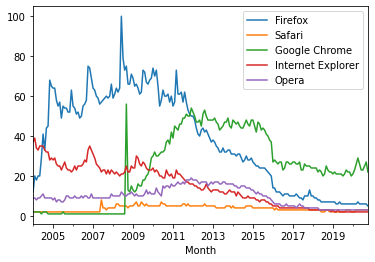

In [2]:
df.plot()

In [3]:
df.head(10)

,Firefox,Safari,Google Chrome,Internet Explorer,Opera
Month,,,,,
2004-01-01,12,2,2,37,9
2004-02-01,20,2,2,39,9
2004-03-01,18,2,2,34,8
2004-04-01,20,2,2,33,9
2004-05-01,20,2,2,35,9
2004-06-01,29,2,1,35,10
2004-07-01,41,2,2,35,11
2004-08-01,33,2,2,33,9
2004-09-01,44,2,2,32,9


In [4]:
rolling_six=df.rolling(window=6).mean()
rolling_six.head(10)

,Firefox,Safari,Google Chrome,Internet Explorer,Opera
Month,,,,,
2004-01-01,NaN,NaN,NaN,NaN,NaN
2004-02-01,NaN,NaN,NaN,NaN,NaN
2004-03-01,NaN,NaN,NaN,NaN,NaN
2004-04-01,NaN,NaN,NaN,NaN,NaN
2004-05-01,NaN,NaN,NaN,NaN,NaN
2004-06-01,19.833333,2.0,1.833333,35.500000,9.000000
2004-07-01,24.666667,2.0,1.833333,35.166667,9.333333
2004-08-01,26.833333,2.0,1.833333,34.166667,9.333333
2004-09-01,31.166667,2.0,1.833333,33.833333,9.500000


<AxesSubplot:xlabel='Month'>

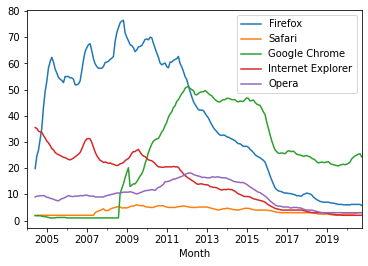

In [5]:
rolling_six.plot()

In [6]:
pct_change_quarterly =df.pct_change(3)*100
pct_change_quarterly

,Firefox,Safari,Google Chrome,Internet Explorer,Opera
Month,,,,,
2004-01-01,NaN,NaN,NaN,NaN,NaN
2004-02-01,NaN,NaN,NaN,NaN,NaN
2004-03-01,NaN,NaN,NaN,NaN,NaN
2004-04-01,66.666667,0.0,0.000000,-10.810811,0.0
2004-05-01,0.000000,0.0,0.000000,-10.256410,0.0
...,...,...,...,...,...
2020-06-01,0.000000,0.0,-11.538462,0.000000,0.0
2020-07-01,-14.285714,0.0,-20.689655,0.000000,0.0
2020-08-01,0.000000,0.0,-3.846154,0.000000,0.0


array([<AxesSubplot:xlabel='Month'>, <AxesSubplot:xlabel='Month'>,
       <AxesSubplot:xlabel='Month'>, <AxesSubplot:xlabel='Month'>,
       <AxesSubplot:xlabel='Month'>], dtype=object)

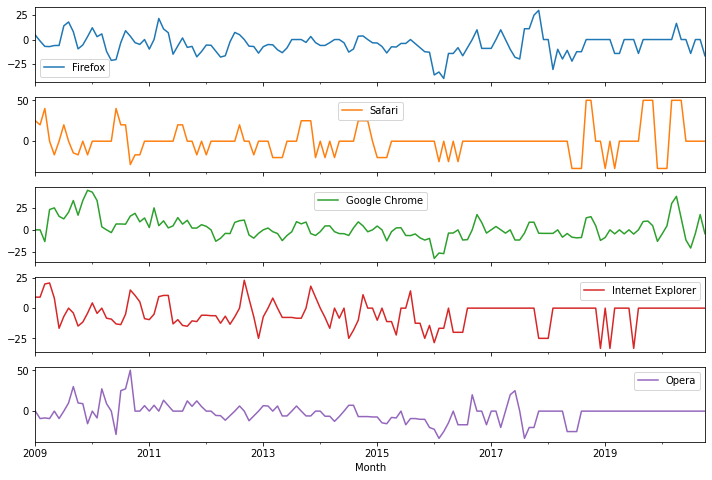

In [7]:
pct_change_quarterly= pct_change_quarterly.loc['2009':]
pct_change_quarterly.plot(subplots=True,figsize=(12,8))

In [8]:
chrome_trends = pd.DataFrame()
for year in ['2009','2012','2015','2018']:
    chrome_trend_per_year = df.loc[year,['Google Chrome']].reset_index(drop=True)
    chrome_trend_per_year.rename(columns={'Google Chrome':year},inplace=True)
    chrome_trends = pd.concat([chrome_trends,chrome_trend_per_year],axis=1)
    print (chrome_trends)

    2009
0     13
1     12
2     13
3     16
4     15
5     15
6     18
7     18
8     20
9     21
10    24
11    29
    2009  2012
0     13    52
1     12    50
2     13    47
3     16    47
4     15    48
5     15    45
6     18    51
7     18    53
8     20    50
9     21    48
10    24    48
11    29    48
    2009  2012  2015
0     13    52    48
1     12    50    45
2     13    47    42
3     16    47    47
4     15    48    46
5     15    45    43
6     18    51    44
7     18    53    43
8     20    50    41
9     21    48    40
10    24    48    38
11    29    48    37
    2009  2012  2015  2018
0     13    52    48    24
1     12    50    45    24
2     13    47    42    24
3     16    47    47    22
4     15    48    46    23
5     15    45    43    22
6     18    51    44    20
7     18    53    43    21
8     20    50    41    25
9     21    48    40    23
10    24    48    38    22
11    29    48    37    22


<AxesSubplot:>

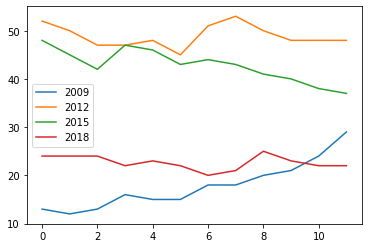

In [9]:
chrome_trends.plot()